# Proyek Analisis Data: Bike Sharing
- **Nama:** Adhistianita Safira Husna
- **Email:** adhisti.anita@gmail.com
- **ID Dicoding:** aadhistii

## Menentukan Pertanyaan Bisnis

- Does the amount of bike sharing increase in 2012?
- Is there any correlation between each feature especially on count with other features?
- When do people feel it is important to use bike sharing bicycle?
- How important is a bike sharing system or app?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
DRIVE = "https://drive.google.com/uc?id="
DAY_ID = "1Q-Ymfk_AdClF5tcVhdxZGL9KUFYX_hlV"
HOUR_ID = "1SfgjdED8UXeVQlZTYCfePmmsytychSgj"

In [3]:
df_day = pd.read_csv(DRIVE + DAY_ID)
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_hour = pd.read_csv(DRIVE + HOUR_ID)
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assessing Data Day

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kolom dteday yang merupakan tipe data datetime (Object)

In [6]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi:", df_day.duplicated().sum())
df_day.describe()

Jumlah duplikasi: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada null pada dataset sehingga dapat dilakukan penilaian pada data selanjutnya

#### Assessing Data Hour

In [8]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti data sebelumnya, terdapat kolom dteday yang merupakan tipe data datetime (Object)

In [9]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi:",df_hour.duplicated().sum())
df_hour.describe()

Jumlah duplikasi: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada null pada dataset sehingga dapat dilakukan penilaian pada data selanjutnya

### Cleaning Data

#### Cleaning Data Day

In [11]:
# Mengganti nama kolom dan drop kolom duplikasi (temp dan atemp). Saya memilih atemp dengan skala 50 derajat celcius
df_day = df_day.drop("atemp", axis=1)

df_day = df_day.rename(columns={
                       'dteday':'date',
                       'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'temp': 'temperature',
                       'hum':'humidity',
                       'cnt':'count'})

In [12]:
df_day['date'] = pd.to_datetime(df_day['date'])

df_day['season'] = df_day['season'].astype('category')
df_day['season'] = df_day['season'].replace({1:'Spring' ,2:'Summer', 3:'Fall', 4:'Winter'})

df_day['year'] = df_day['year'].astype('category')
df_day['year'] = df_day['year'].replace({0:2011, 1:2012})

df_day['month'] = df_day['month'].astype('category')
df_day['month'] = df_day['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

df_day['weather'] = df_day['weather'].astype('category')
df_day['weather'] = df_day['weather'].replace({1:'Clear', 2:'Mist', 3:'Light Rain', 4:'Heavy Rain'})

df_day['weekday'] = df_day['weekday'].astype('category')
df_day['weekday'] = df_day['weekday'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

df_day['holiday'] = df_day['holiday'].astype('category')
df_day['holiday'] = df_day['holiday'].replace({0:'No', 1:'Yes'})

df_day['workingday'] = df_day['workingday'].astype('category')
df_day['workingday'] = df_day['workingday'].replace({0:'No', 1:'Yes'})

In [13]:
for col in df_day.columns[2:9]:
  print(col, ":", df_day[col].unique(), "\n")

season : ['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter'] 

year : [2011, 2012]
Categories (2, int64): [2011, 2012] 

month : ['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec'] 

holiday : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

weekday : ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
Categories (7, object): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                         'Sunday'] 

workingday : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

weather : ['Mist', 'Clear', 'Light Rain']
Categories (3, object): ['Clear', 'Mist', 'Light Rain'] 



Tidak ada data yang aneh dalam beberapa data kategorial sehingga tidak perlu diganti, ditambah, atau dikurang nilainya.

#### Cleaning Data Hour

In [14]:
df_hour = df_hour.drop("atemp", axis=1)

df_hour = df_hour.rename(columns={
                       'dteday':'date',
                       'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'temp': 'temperature',
                       'hum':'humidity',
                       'cnt':'count'})

In [15]:
df_hour['date'] = pd.to_datetime(df_hour['date'])

df_hour['season'] = df_hour['season'].astype('category')
df_hour['season'] = df_hour['season'].replace({1:'Spring' ,2:'Summer', 3:'Fall', 4:'Winter'})

df_hour['year'] = df_hour['year'].astype('category')
df_hour['year'] = df_hour['year'].replace({0:2011, 1:2012})

df_hour['month'] = df_hour['month'].astype('category')
df_hour['month'] = df_hour['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

df_hour['weather'] = df_hour['weather'].astype('category')
df_hour['weather'] = df_hour['weather'].replace({1:'Clear', 2:'Mist', 3:'Light Rain', 4:'Heavy Rain'})

df_hour['weekday'] = df_hour['weekday'].astype('category')
df_hour['weekday'] = df_hour['weekday'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

df_hour['holiday'] = df_hour['holiday'].astype('category')
df_hour['holiday'] = df_hour['holiday'].replace({0:'No', 1:'Yes'})

df_hour['workingday'] = df_hour['workingday'].astype('category')
df_hour['workingday'] = df_hour['workingday'].replace({0:'No', 1:'Yes'})

In [16]:
for col in df_hour.columns[2:9]:
  print(col, ":", df_hour[col].unique(), "\n")

season : ['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter'] 

year : [2011, 2012]
Categories (2, int64): [2011, 2012] 

month : ['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec'] 

hour : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 

holiday : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

weekday : ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
Categories (7, object): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                         'Sunday'] 

workingday : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 



Tidak ada data yang aneh dalam beberapa data kategorial sehingga tidak perlu diganti, ditambah, atau dikurang nilainya.

#### Merge Data

In [17]:
df_day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,No,Sunday,No,Mist,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Monday,No,Mist,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Tuesday,Yes,Clear,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Wednesday,Yes,Clear,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Thursday,Yes,Clear,0.226957,0.436957,0.186900,82,1518,1600


In [18]:
df_hour.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,No,Sunday,No,Clear,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Sunday,No,Clear,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Sunday,No,Clear,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Sunday,No,Clear,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Sunday,No,Clear,0.24,0.75,0.0,0,1,1


In [19]:
df = df_day.merge(df_hour, on='date', how='inner',suffixes=('_day', ''))
df.head()

,instant_day,date,season_day,year_day,month_day,holiday_day,weekday_day,workingday_day,weather_day,temperature_day,...,holiday,weekday,workingday,weather,temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,No,Sunday,No,Mist,0.344167,...,No,Sunday,No,Clear,0.24,0.81,0.0,3,13,16
1,1,2011-01-01,Spring,2011,Jan,No,Sunday,No,Mist,0.344167,...,No,Sunday,No,Clear,0.22,0.80,0.0,8,32,40
2,1,2011-01-01,Spring,2011,Jan,No,Sunday,No,Mist,0.344167,...,No,Sunday,No,Clear,0.22,0.80,0.0,5,27,32
3,1,2011-01-01,Spring,2011,Jan,No,Sunday,No,Mist,0.344167,...,No,Sunday,No,Clear,0.24,0.75,0.0,3,10,13
4,1,2011-01-01,Spring,2011,Jan,No,Sunday,No,Mist,0.344167,...,No,Sunday,No,Clear,0.24,0.75,0.0,0,1,1


In [20]:
df.to_csv("bike_data.csv", index=False)

## Exploratory Data Analysis (EDA)

In [21]:
df.describe(include="all")

<ipython-input-21-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,instant_day,date,season_day,year_day,month_day,holiday_day,weekday_day,workingday_day,weather_day,temperature_day,...,holiday,weekday,workingday,weather,temperature,humidity,windspeed,casual,registered,count
count,17379.000000,17379,17379,17379.0,17379,17379,17379,17379,17379,17379.000000,...,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2.0,12,2,7,2,3,NaN,...,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012.0,May,No,Sunday,Yes,Clear,NaN,...,No,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734.0,1488,16879,2512,11865,11040,NaN,...,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,...,NaN,NaN,NaN,NaN,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.182445,...,NaN,NaN,NaN,NaN,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,...,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,...,NaN,NaN,NaN,NaN,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000


In [22]:
df.groupby(by="season").agg({
    "instant": "count",
    "count": ["max", "mean", "std"]
})

instant count                        
         count   max        mean         std
season                                      
Spring    4242   801  111.114569  119.224010
Summer    4409   957  208.344069  188.362473
Fall      4496   977  236.016237  197.711630
Winter    4232   967  198.868856  182.967972

Dari data di atas, didapatkan bike sharing terbanyak dilakukan pada season 3 atau fall.

In [23]:
df.groupby(by="year").instant.nunique().sort_values(ascending=False)

year
2012    8734
2011    8645
Name: instant, dtype: int64

Dari data di atas, didapatkan bike sharing terbanyak dilakukan pada tahun 1 atau 2012.

In [24]:
df.groupby(by="month").instant.nunique().sort_values(ascending=False)

month
May    1488
Jul    1488
Dec    1483
Aug    1475
Mar    1473
Oct    1451
Jun    1440
Apr    1437
Sep    1437
Nov    1437
Jan    1429
Feb    1341
Name: instant, dtype: int64

Dari data di atas, didapatkan bike sharing terbanyak dilakukan pada bulan 7 atau Juli.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat peningkatan peminjam sepeda dari tahun 2011 ke 2012?

Ya, terdapat peningkatan banyaknya sepeda untuk peminjaman yaitu sebesar lebih kurang 100 sepeda

[Text(0.5, 1.0, 'Bike Sharing Over Time')]

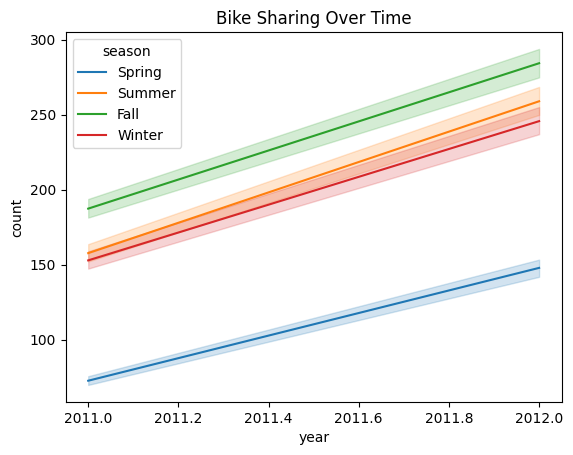

In [25]:
year_plot = sns.lineplot(data = df, x = "year", y = "count", hue="season")
year_plot.set(title = "Bike Sharing Over Time")

### Pertanyaan 2: Apakah terdapat korelasi terhadap masing-masing data terutama pada jumlah peminjaman sepeda terhadap suhu, cuaca, dan lainnya?

Jawab: Terdapat korelasi yang tidak terlalu signifikan pada banyaknya peminjaman sepeda dengan suhu dan waktu (40%) yang ditunjukkan dengan korelasi count dengan kolom lainnya.

<ipython-input-26-f67e7eb7f5ea>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[df.columns[1:]].corr()


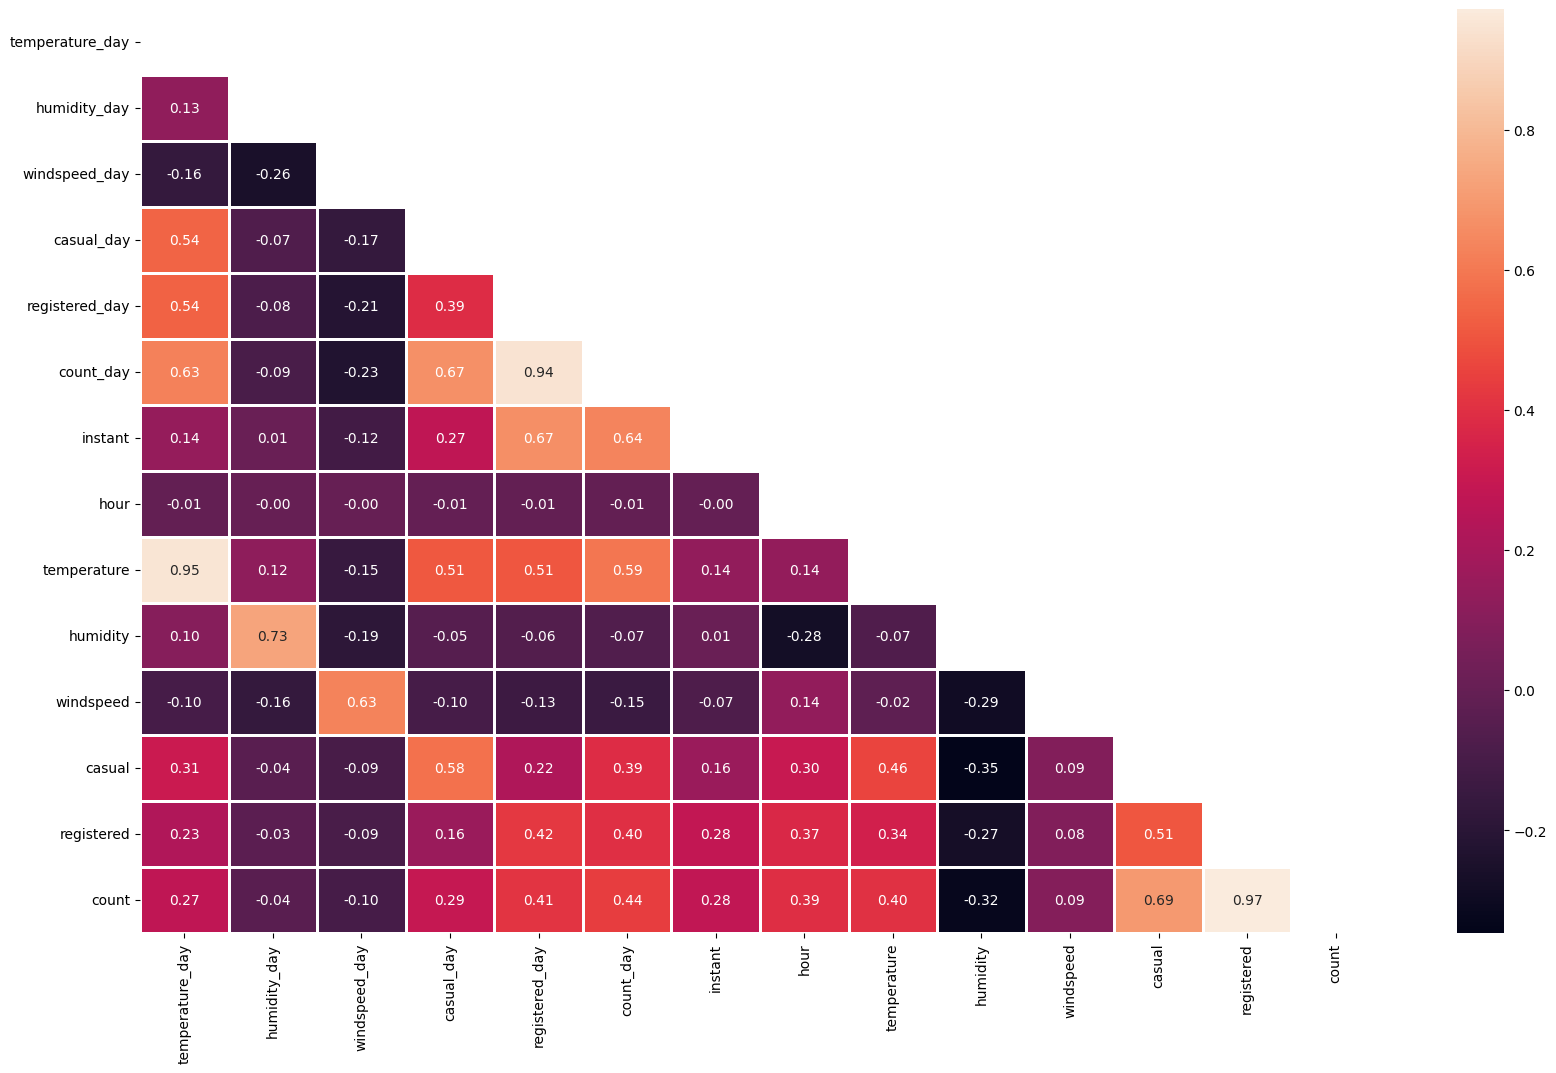

In [26]:
plt.figure(figsize = (20, 12))

corr = df[df.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

### Pertanyaan 3: Kapankah waktu terbaik untuk sistem peminjaman sepeda berjalan?

Waktu terbaik untuk sistem peminjaman sepeda adalah pada  

[Text(0.5, 1.0, 'Bike Sharing in Hour and Season')]

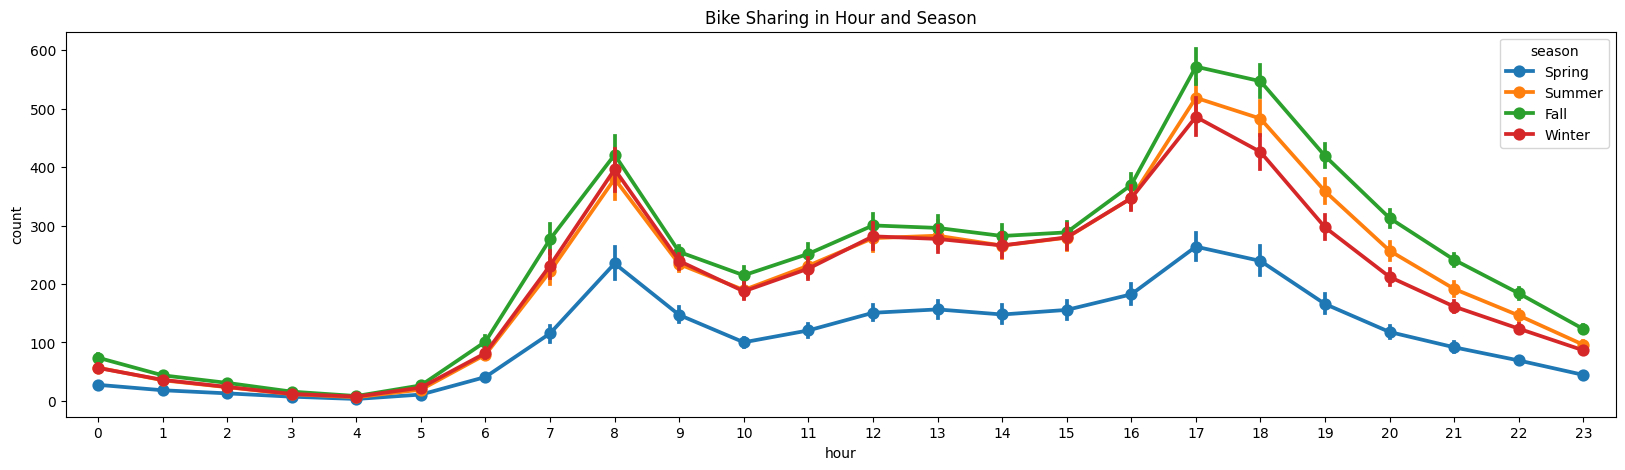

In [27]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Bike Sharing in Hour and Season')

[Text(0.5, 1.0, 'Bikes Sharing Everyday')]

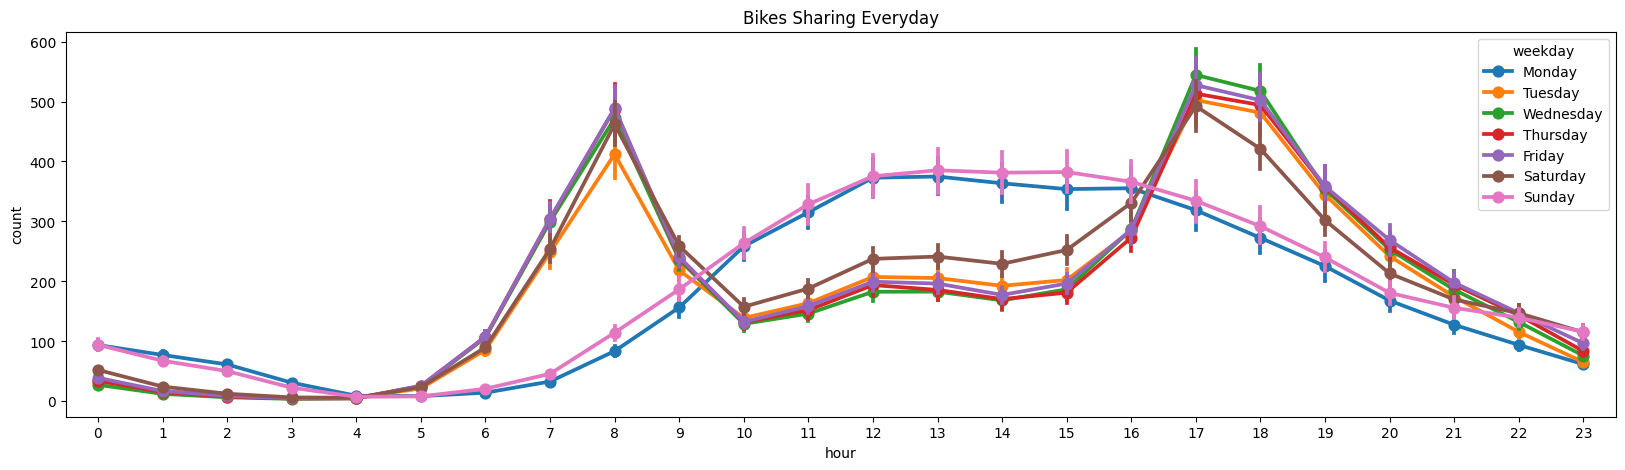

In [28]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Bikes Sharing Everyday')

[Text(0.5, 1.0, 'Bike Sharing Based From Weather and Month')]

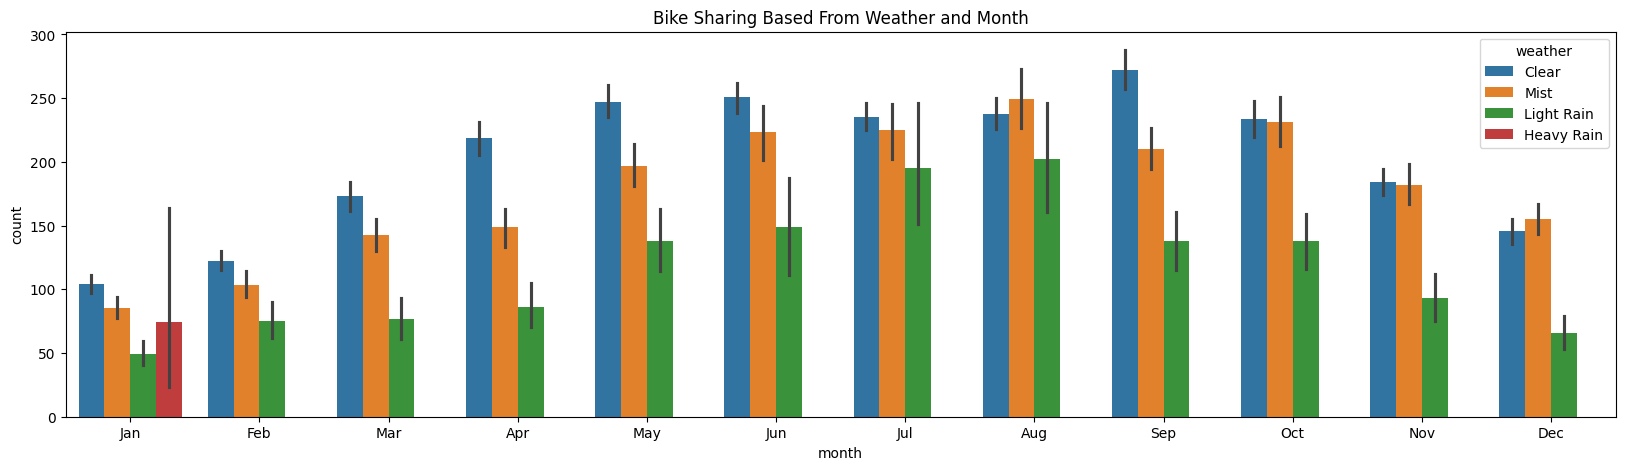

In [29]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='month', y='count', hue='weather', ax=ax)
ax.set(title='Bike Sharing Based From Weather and Month')

[Text(0.5, 1.0, 'Bikes Sharing during Workingday')]

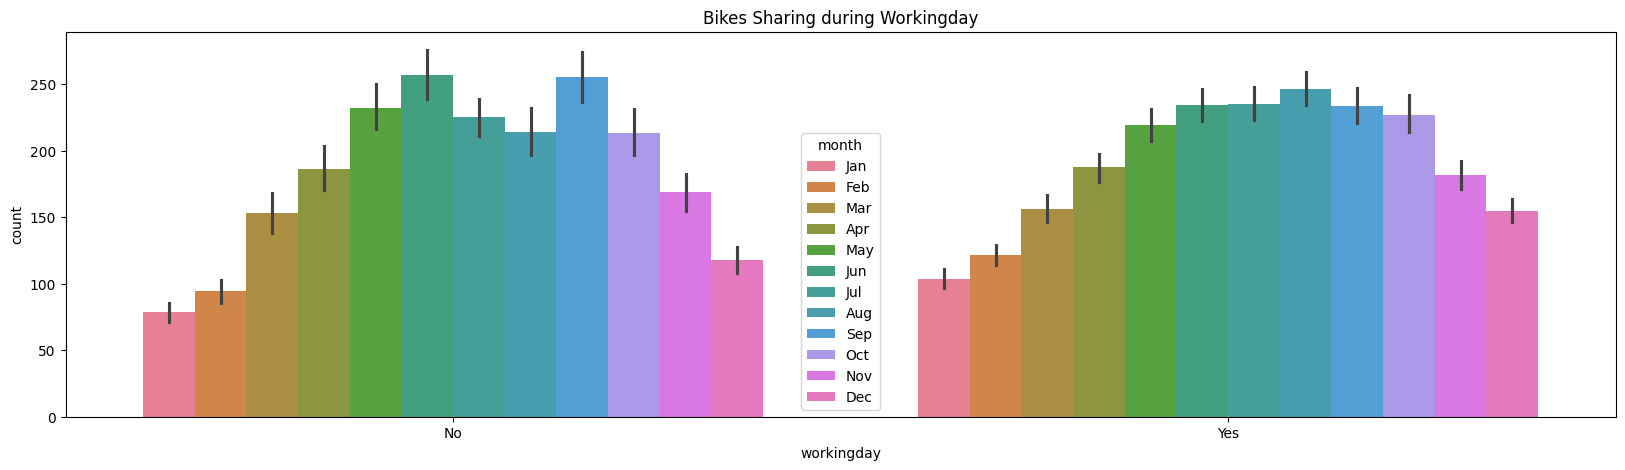

In [30]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='workingday', y='count', hue='month', ax=ax)
ax.set(title='Bikes Sharing during Workingday')

### Pertanyaan 4: Seberapa penting sistem atau aplikasi untuk peminjaman sepeda dibutuhkan?

Hal ini dapat diketahui dari perbandingan pengguna yang telah teregistrasi (registered) dan pengguna yang belum teregistrasi (casual) menggunakan pie chart.

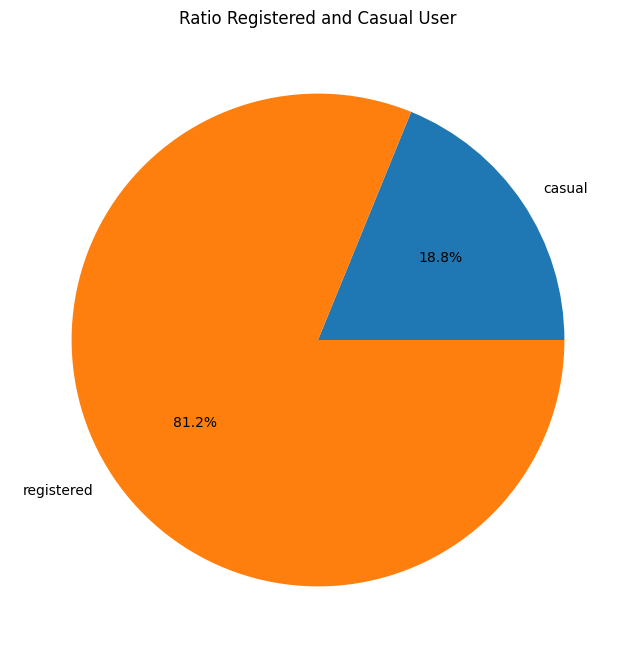

In [31]:
user = ['casual', 'registered']
count_casual = df_hour['casual'].sum()
count_registered = df_hour['registered'].sum()
count = [count_casual, count_registered]

plt.figure(figsize=(8, 8))
plt.pie(count, labels=user, autopct='%1.1f%%',)

plt.title('Ratio Registered and Casual User')

plt.show()

## Conclusion

- Peminjaman sepeda meningkat pada tahun 2012 sebanyak lebih kurang 100 sepeda
- Terdapat sedikit korelasi positif atau hubungan antara suhu dan waktu dengan jumlah peminjaman sepeda dan frekuensi peminjaman sepeda dan korelasi negatif pada jumlah peminjaman dengan cuaca yaitu semakin sedikit peminjam ketika cuaca buruk.
- Waktu terbaik untuk meminjam sepeda ditunjukkan pada pukul awal jam kerja (pukul 7-9) dan sepulang jam kerja (pukul 16-19). Hal tersebut dapat dikaitkan dengan pengguynaan sepeda lebih sering dilakukan untuk berangakat dan pulang kerja.
- Lebih banyak pengguna menggunakan sistem dan teregistrasi pada sistem dibandngkan tanpa teregistrasi pada sistem. Sehingga, sistem merupakan hal yang penting atau dibutuhkan.